## **Task 1**
#1- Identify, and list here, what aesthetics are being used and which variables are being mapped to each aesthetic.  
  Aesthetics:


*   X/Y Position -- Life expectancy on y-axis, income on the x-axis
*   Color -- World Regions
*   Size -- Country Population
*   Texts (Annotations) -- year of which this data is from (2010 on the back)and also the income levels on top

#2- Import the q1data.csv dataset.

In [ ]:
# Importing q1data
import pandas as pd
df = pd.read_csv('C:/Users/Fernando Fonseca/Documents/Cal_Poly/Grad_school/Fall/GSB_544/Data/q1data.csv')
df = df.dropna(subset = ['four_regions'])

# 3- Recreate the plot as best you can using plotnine.


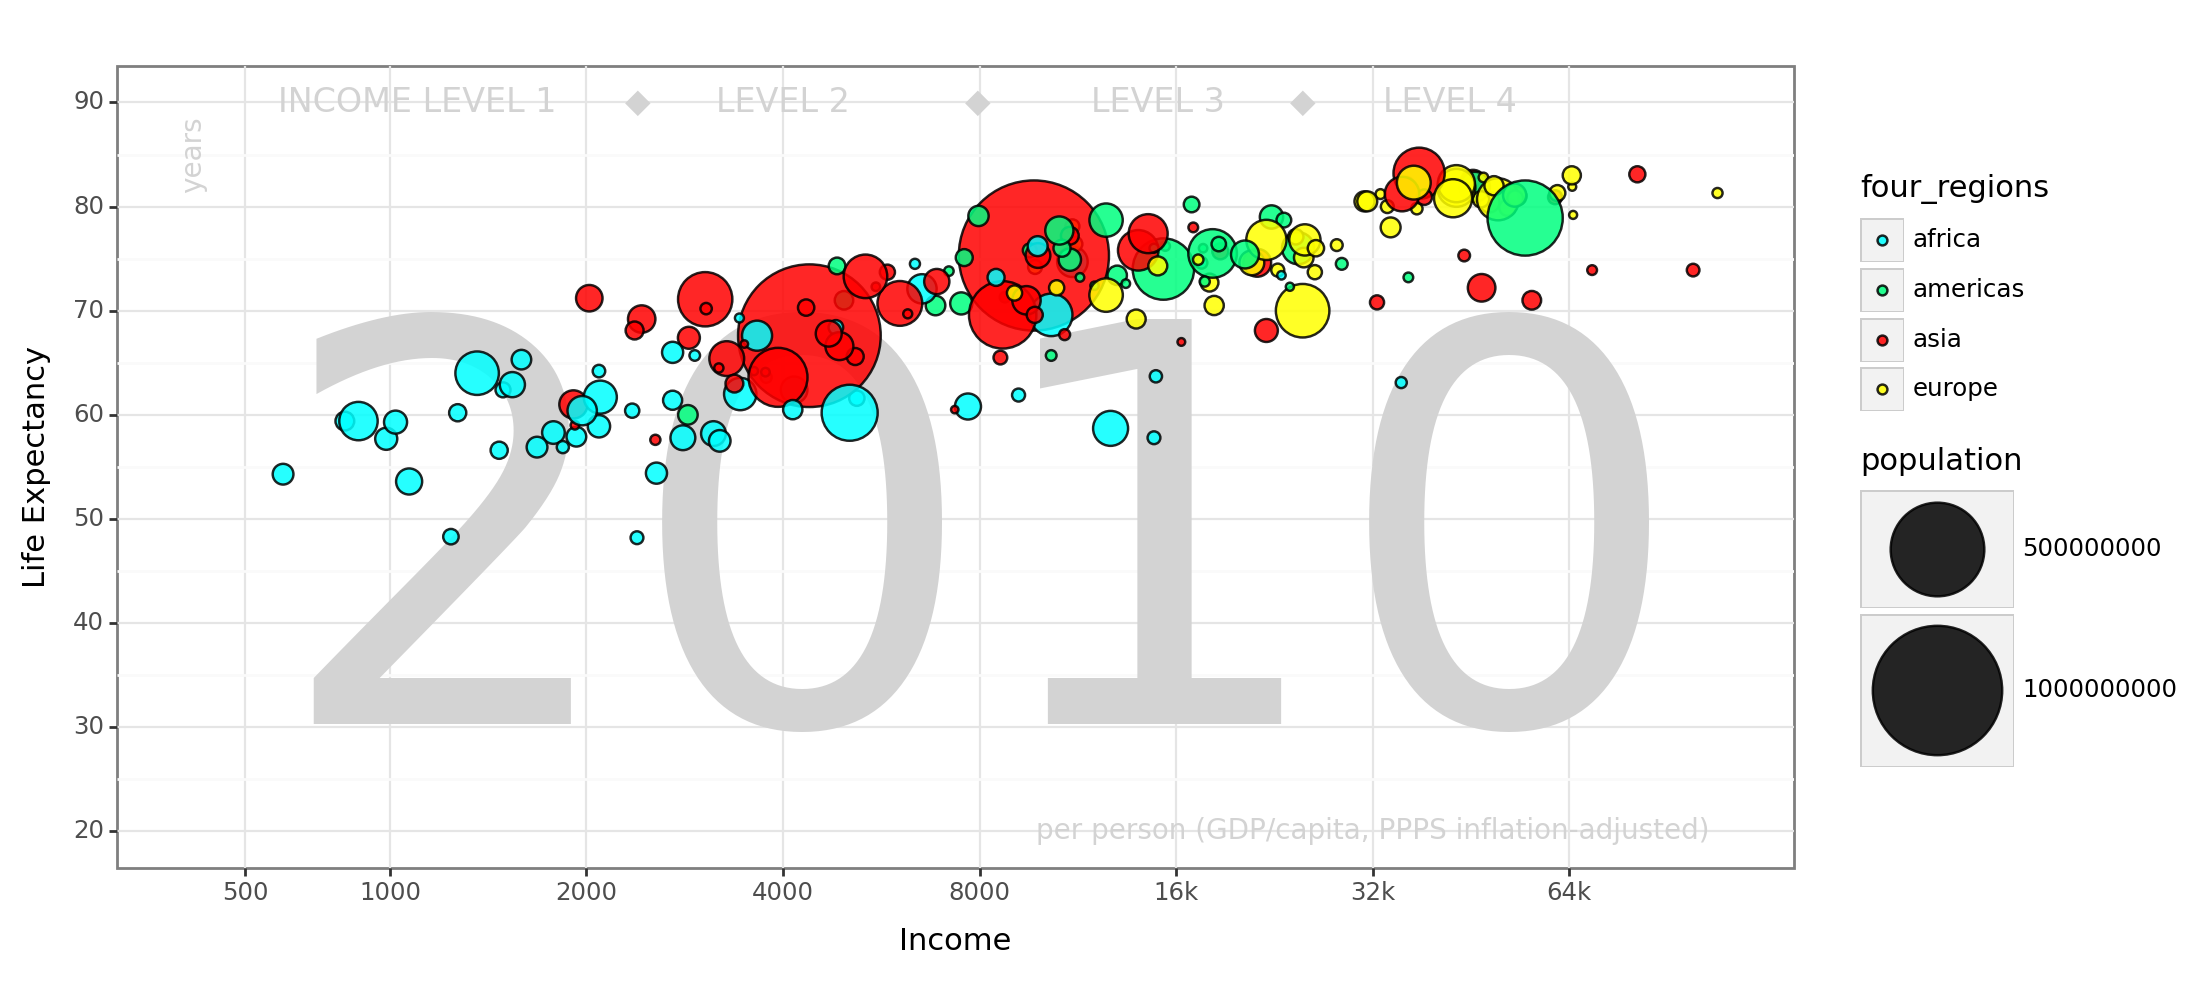

In [13]:
from plotnine import *

#creatinng data frame for geom_text

dflabel = pd.DataFrame({
    'x': [8000, 1100, 2400,4000,7950,15000,25000,42000,500,32000],
    'y': [45, 90,90,90,90,90,90,90, 85, 20],
    'text': ['2010','INCOME LEVEL 1', '◆', 'LEVEL 2','◆', 'LEVEL 3','◆', 'LEVEL 4','years', 'per person (GDP/capita, PPPS inflation-adjusted)'],

})

#creating custom colors for scale_fill_manual based on variable four_regions
custom_colors = {
    'asia': 'red',
    'europe': 'yellow',
    'africa': 'cyan',
    'americas': 'springgreen',

}

# Recreating the plot
plot=(ggplot(df,
             aes(x='income', y='life_exp')
             )
        + geom_text(data=dflabel, mapping=aes(label = 'text', x='x', y='y'), color = 'lightgray', size = [200, 12,12,12,12,12,12,12,10,10], angle=[0, 0, 0, 0, 0, 0, 0, 0, 90,0])
        + geom_point(aes(fill='four_regions', size='population'), na_rm=True, alpha=.85)
        + xlab ('Income')
        + ylab ('Life Expectancy')
        + scale_x_continuous(trans = 'log2', breaks =[600,1000,2000,4000,8000,16000,32000,64000], labels = ['500','1000','2000','4000','8000','16k','32k','64k'])
        + scale_y_continuous(limits=(20,90), breaks=(20,30,40,50,60,70,80,90))
        + scale_fill_manual (values=custom_colors)
        + scale_size(range=(1,30))
        + theme_bw()
        + theme(figure_size=(11, 5))
)

print(plot)

# 4- What other geometries could you use here besides geom_point? Provide an actual plot of another geometry being used here and why it’s good or bad for visualizing these data.
You could use Box plot to represent this data, but you would only be able to do one variable at a time. You could also use violin plot or a density plot. All of those would need separate graphs for each numeric variable. The example i provided below is using a violin plot. I have three plots, one for life expectancy, one for population and one for income, all divided by the country world region. I would say these graphs would be good if you are interested in comparing each region to each other for just one of the variables, but the bubble graph shows us a better representation since we can compare all of those at the same time.

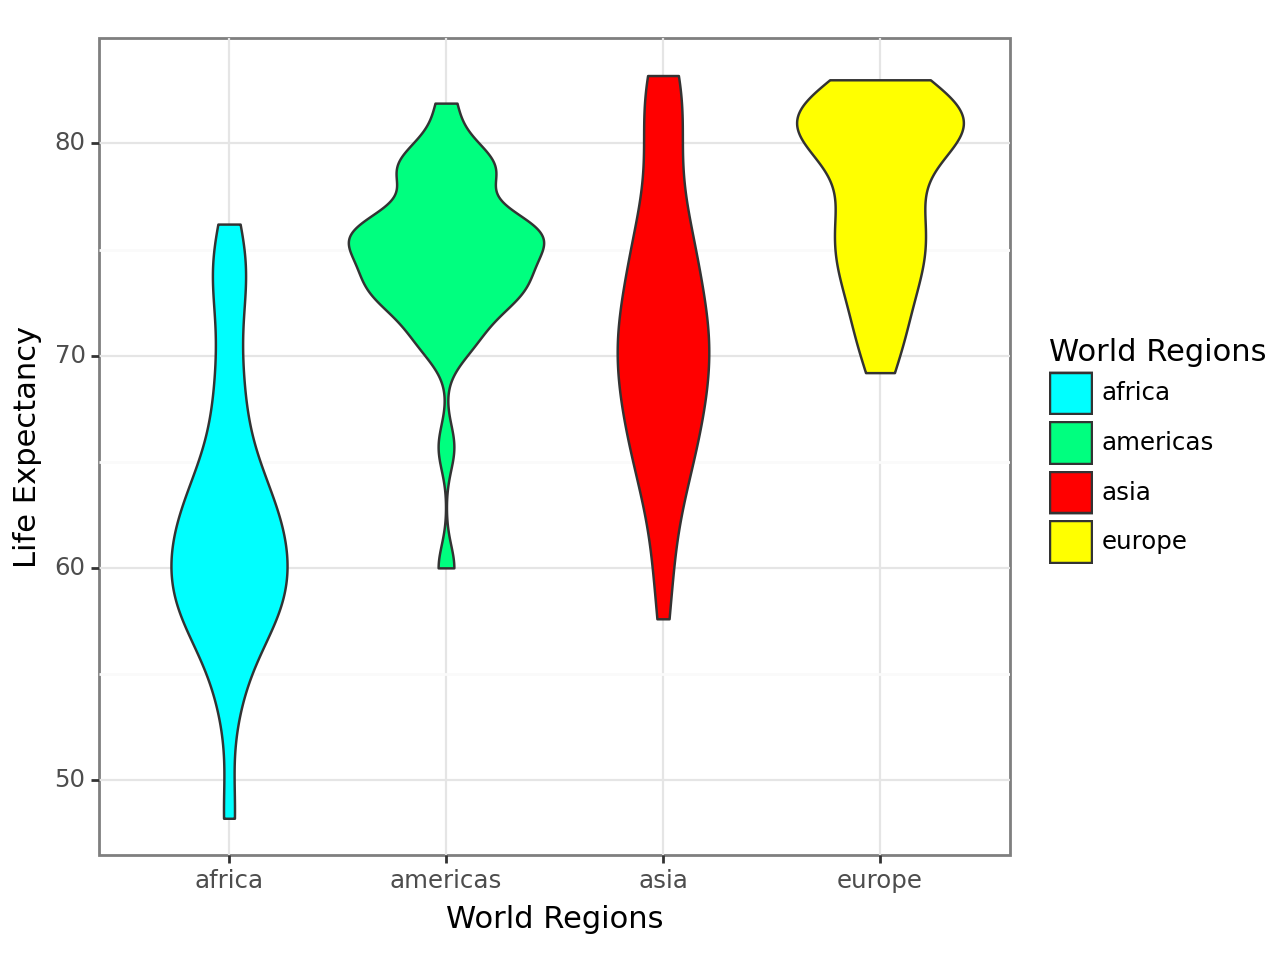

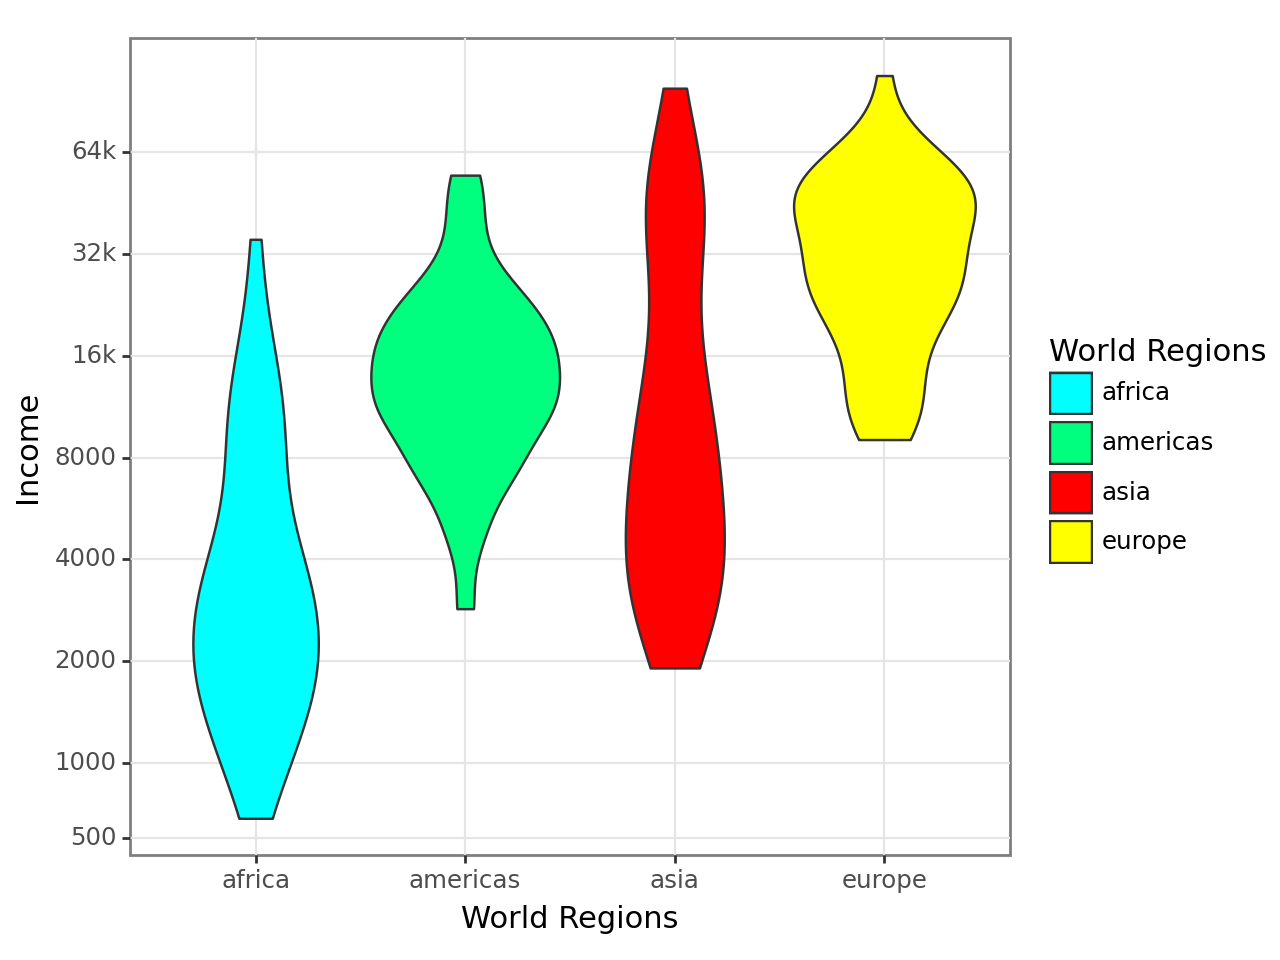

C:\Anaconda\Lib\site-packages\plotnine\layer.py:284: PlotnineWarning: stat_ydensity : Removed 2 rows containing non-finite values.


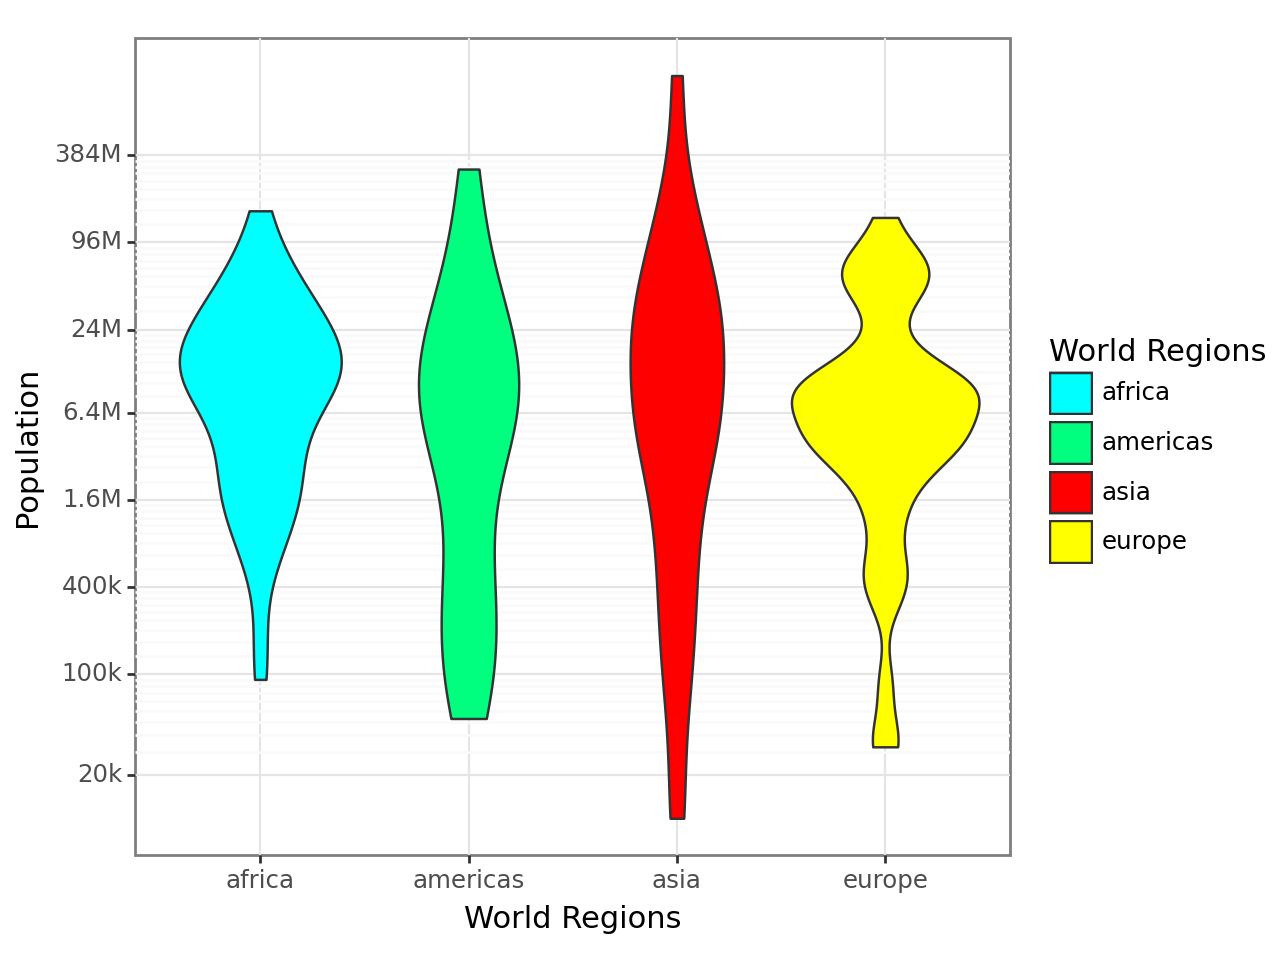

In [14]:
#life expectancy by world regions plot
plot = (ggplot (df, aes('four_regions', 'life_exp', fill = 'four_regions') )
          + geom_violin()
          + ylab ('Life Expectancy')
          + xlab ('World Regions')
          + scale_fill_manual (values=custom_colors)
          + labs(fill='World Regions')
          + theme_bw()
        )

#income by world regions plot
plot2 = (ggplot (df, aes('four_regions', 'income', fill = 'four_regions'))
          + geom_violin()
          + ylab ('Income')
          + xlab ('World Regions')
          + scale_y_continuous(trans = 'log2',breaks =[600,1000,2000,4000,8000,16000,32000,64000], labels = ['500','1000','2000','4000','8000','16k','32k','64k'])
          + scale_fill_manual (values=custom_colors)
          + labs(fill='World Regions')
          + theme_bw()
          )

#population by world regions plot
plot3 = (ggplot (df, aes('four_regions', 'population', fill = 'four_regions'))
          + geom_violin()
          + ylab ('Population')
          + xlab ('World Regions')
          + scale_y_continuous(trans = 'log10',breaks =[20000,100000,400000,1600000,6400000,24000000,96000000,384000000], labels = ['20k','100k','400k','1.6M','6.4M','24M','96M','384M'])
          + scale_fill_manual (values=custom_colors)
          + labs(fill='World Regions')
          + theme_bw()
          )

#print Plots
print(plot)
print(plot2)
print(plot3)

## **Task 2**
# 1- Identify, and list here, what aesthetics are being used and which variables are being mapped to each aesthetic.

Aestethics
*   X/Y Position -- Imports as a % of gdp on y-axis, exports as a % of gdp on the x-axis
*   Color -- World Regions
*   Size -- Country energy use
*   Texts (Annotations) -- year of which this data is from (1997 on the back)

# 2- Import the q2data.csv dataset.


In [16]:
#Importing q2data
df2 = pd.read_csv('C:/Users/Fernando Fonseca/Documents/Cal_Poly/Grad_school/Fall/GSB_544/Data/q2data.csv')

# 3 - Recreate the plot as best you can using plotnine.

In [17]:
# droping NaN values
df2 = df2.dropna(subset=['exports', 'energy','imports','four_regions'])

#checking for data types on variable that im using
print(df2[['imports', 'exports', 'energy', 'four_regions']].dtypes)

# converting energy k values to 1000s and converting variable to float
def value_to_float(x):
    if 'k' in str(x):
        return float(x.replace('k', '')) * 1000
    else:
        return float(x)

df2['energy'] = df2['energy'].apply(value_to_float)

#chcking for datatypes to see if it worked
print(df2[['imports', 'exports', 'energy', 'four_regions']].dtypes)


imports         float64
exports         float64
energy           object
four_regions     object
dtype: object
imports         float64
exports         float64
energy          float64
four_regions     object
dtype: object


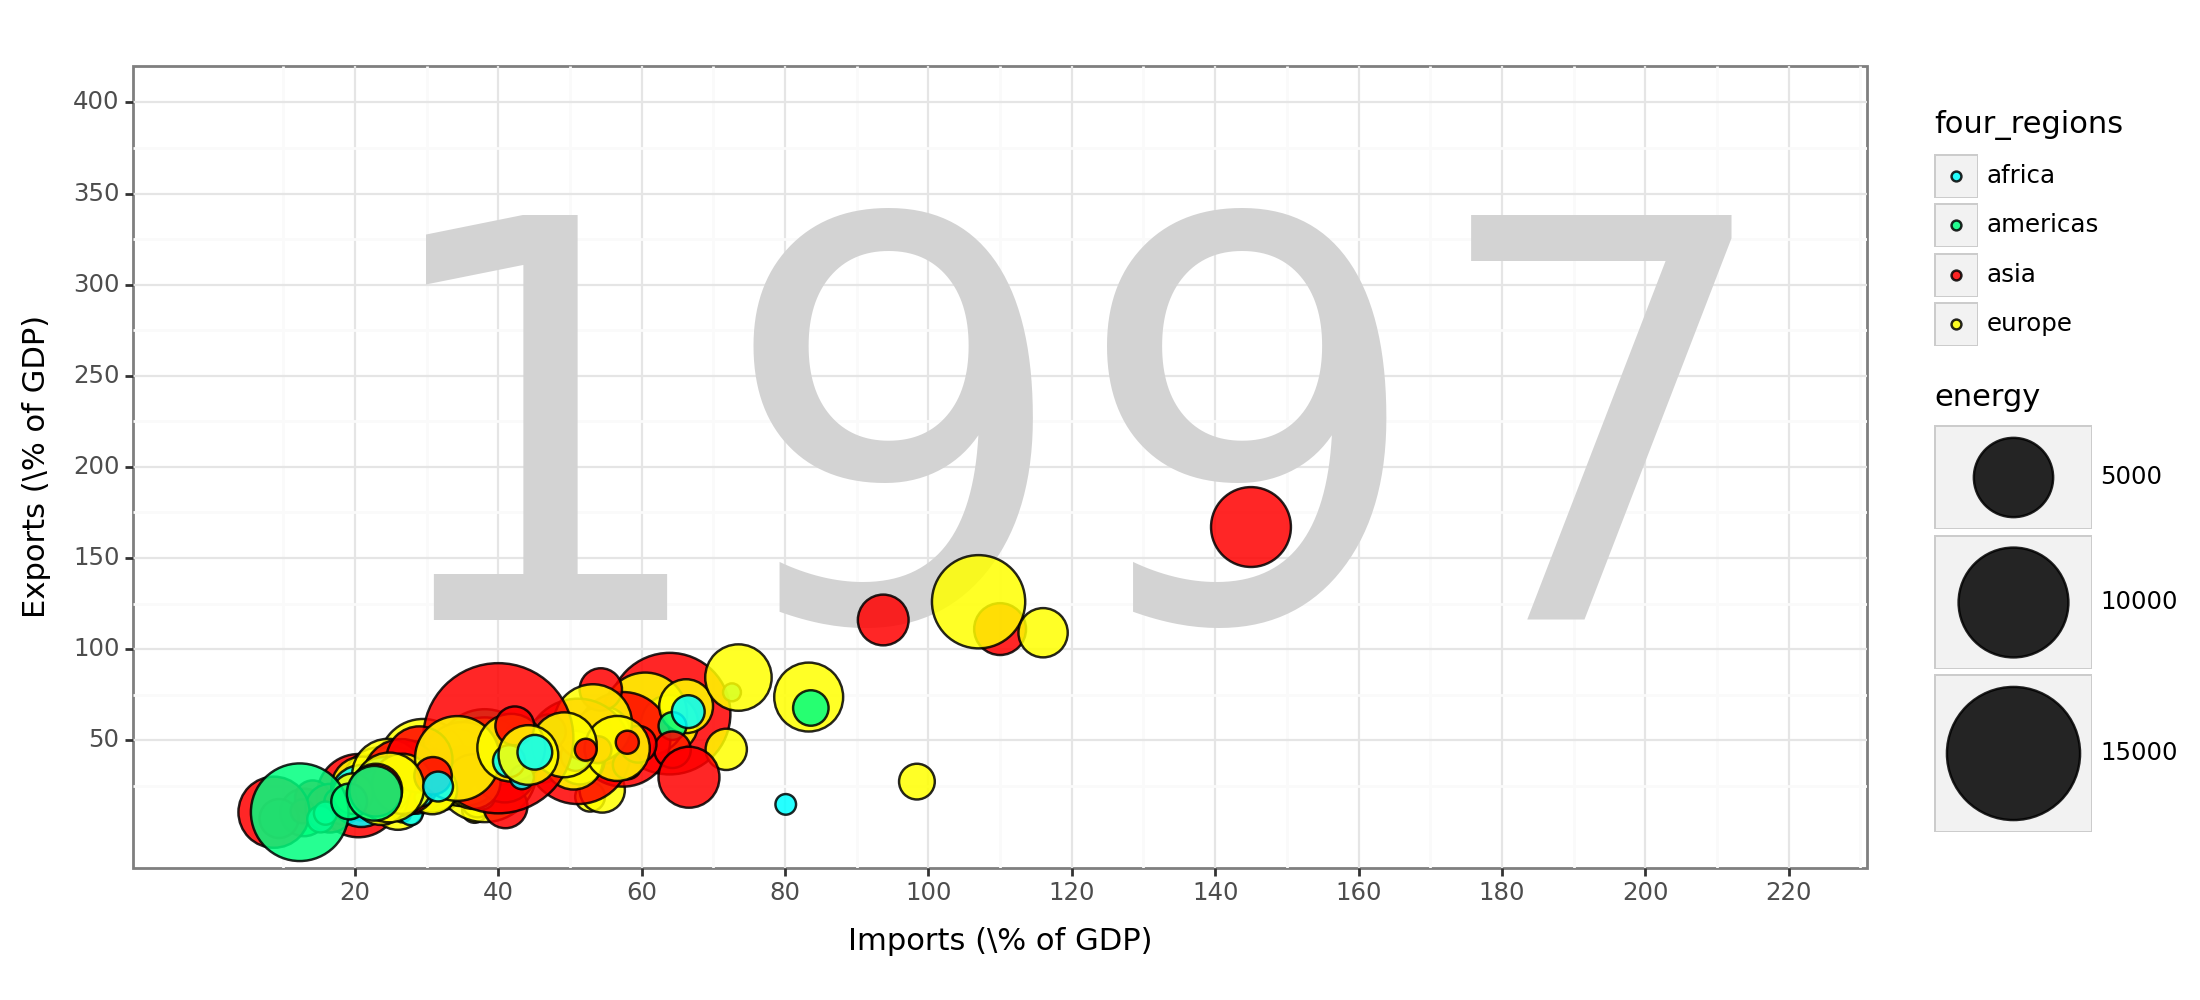

In [18]:
# setting up dataframe for Geom text
dflabel2 = pd.DataFrame({
    'x': [120],
    'y': [200],
    'text': ['1997'],

})

#setting up custom colors
custom_colors = {
    'asia': 'red',
    'europe': 'yellow',
    'africa': 'cyan',
    'americas': 'springgreen',

}

#creating the plot
plot=(ggplot(df2,
             aes(x='imports', y='exports')
             )
        + geom_text(data=dflabel2, mapping=aes(label = 'text', x='x', y='y'), color = 'lightgray', size = [200])
        + geom_point(aes(fill='four_regions', size='energy'), na_rm=True, alpha=.85)
        + xlab ('Imports (\% of GDP)')
        + ylab ('Exports (\% of GDP)')
        + scale_x_continuous(breaks =[20,40,60,80,100,120,140,160,180,200,220], limits = (0,220))
        + scale_y_continuous(breaks=(50,100,150,200,250,300,350,400), limits = (0,400))
        + scale_fill_manual (values=custom_colors)
        + scale_size(range=(1,30))
        + theme_bw()
        + theme(figure_size=(11, 5))
)


print(plot)

# 4- What other geometries could you use here besides geom_point? Provide an actual plot of another geometry being used here and why it’s good or bad for visualizing these data.
Again, finding another geometry to represent 3 numeric variables and two categorical (country and their world region) is tricky. We could use bar charts, boxplots, or a violin plot again. I provided a plot where i calculated the export to import ratio to bring it down to 2 numeric variables, but even so these plots are not great. on the first plot you can compare the countries for each reagion separetely, but you dont know what country is the one you are looking at. On the violin plots, you can get a good comparison between the regions but just for one of the variables at a time. You also do not know which country in each region have the highest or lowest import-to-export ratio for example, even if this graph was interactive. (as inthe bubble chart on gapminder you could check for countries by clicking on the bubble)

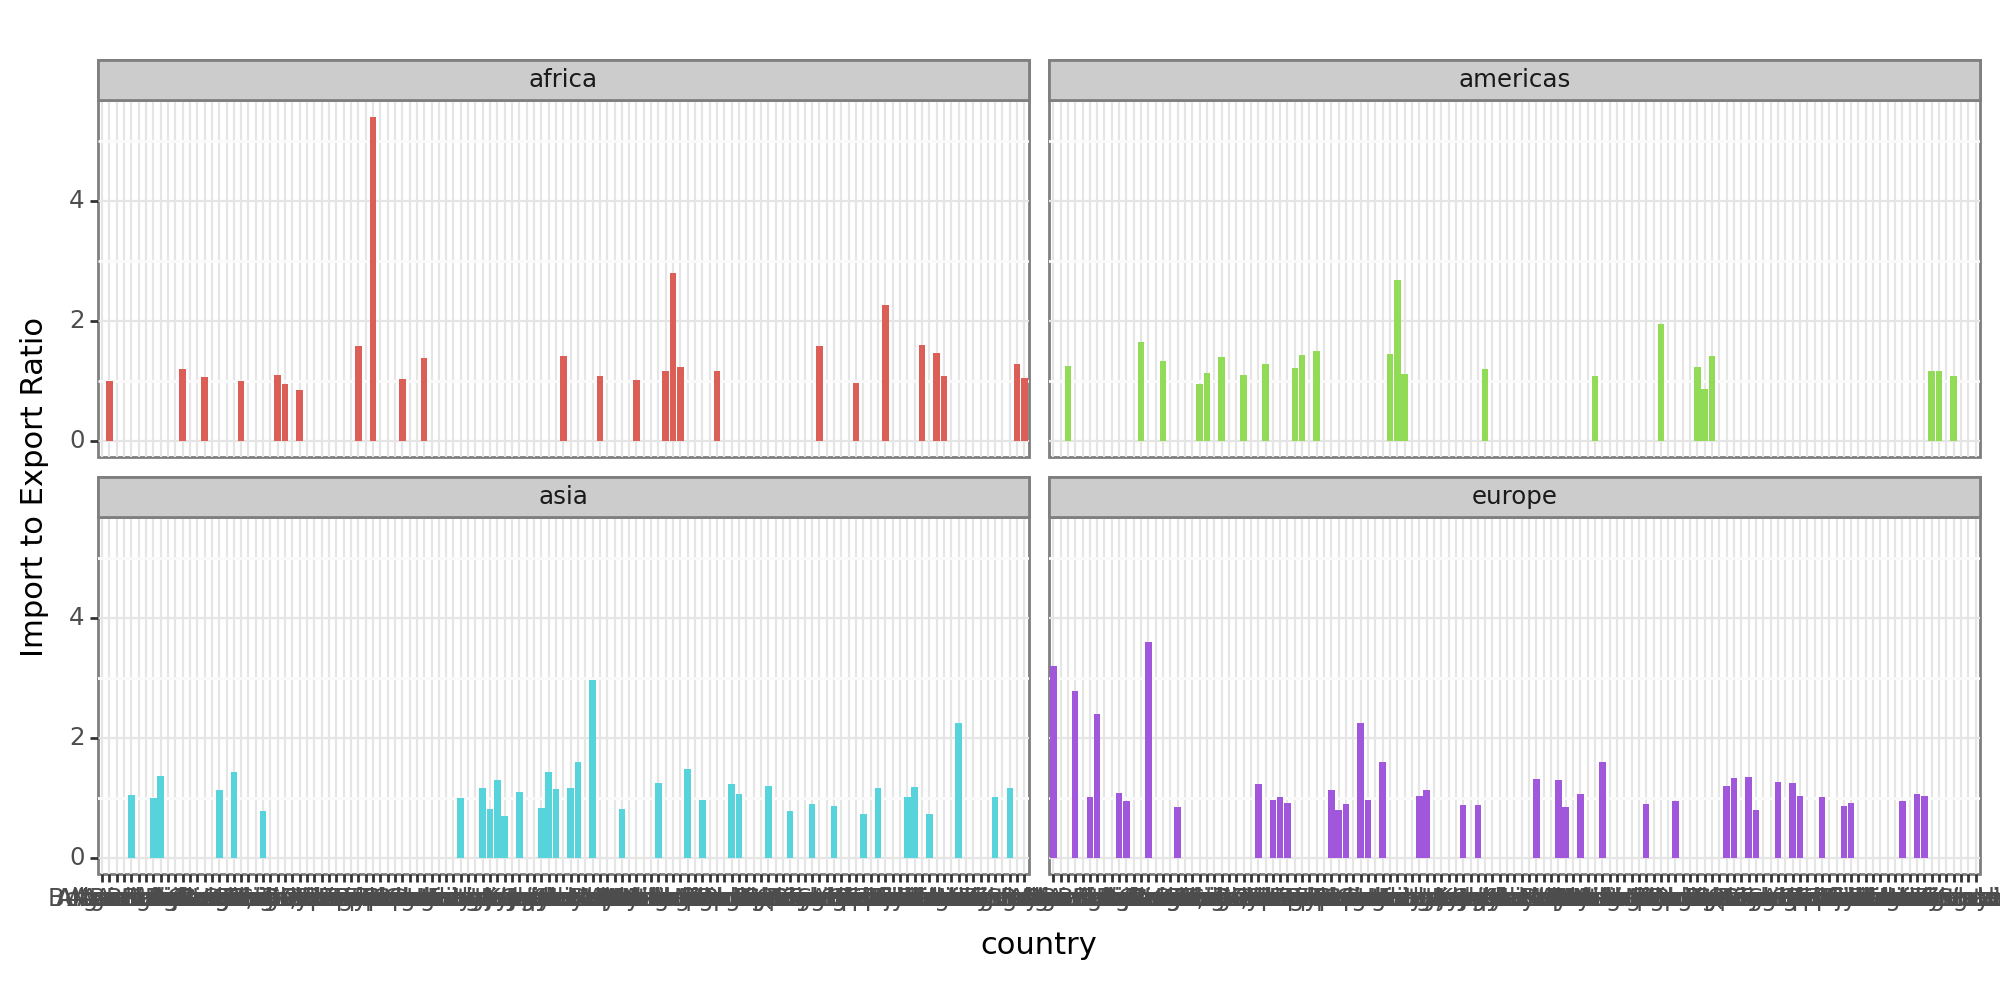

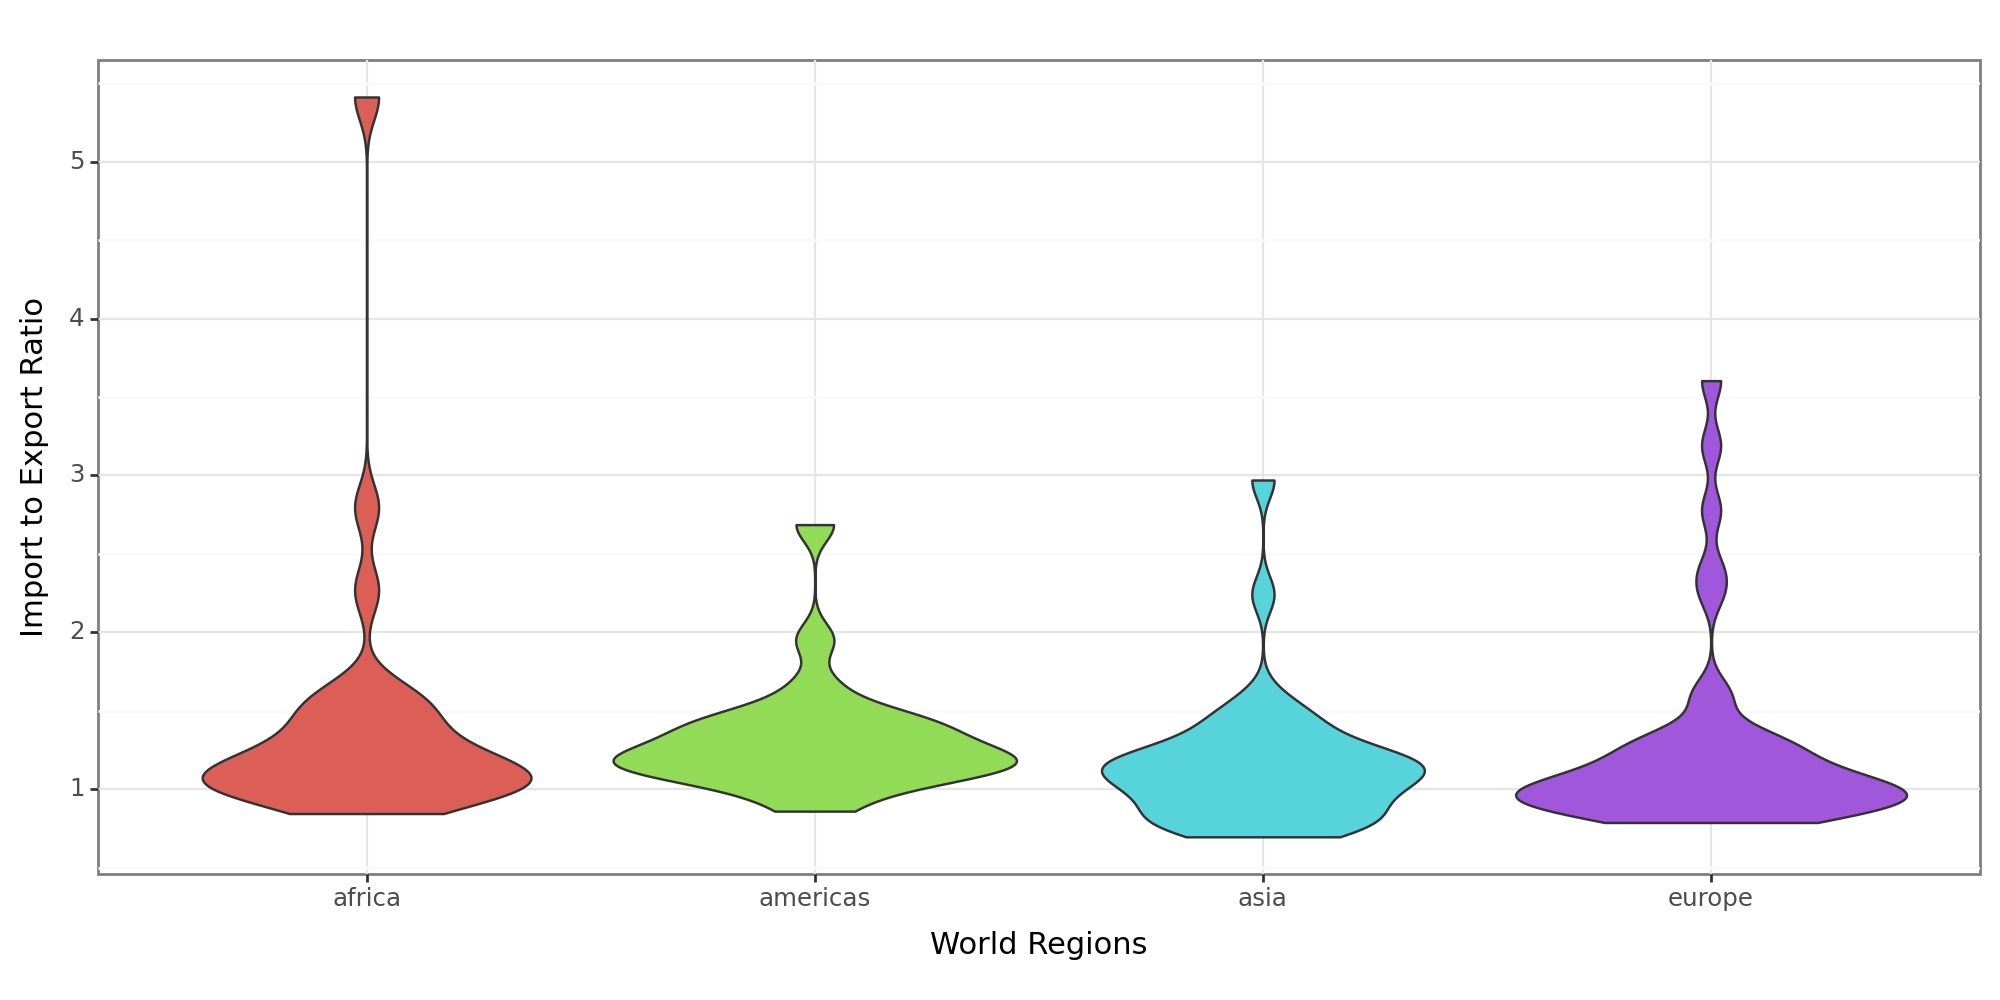

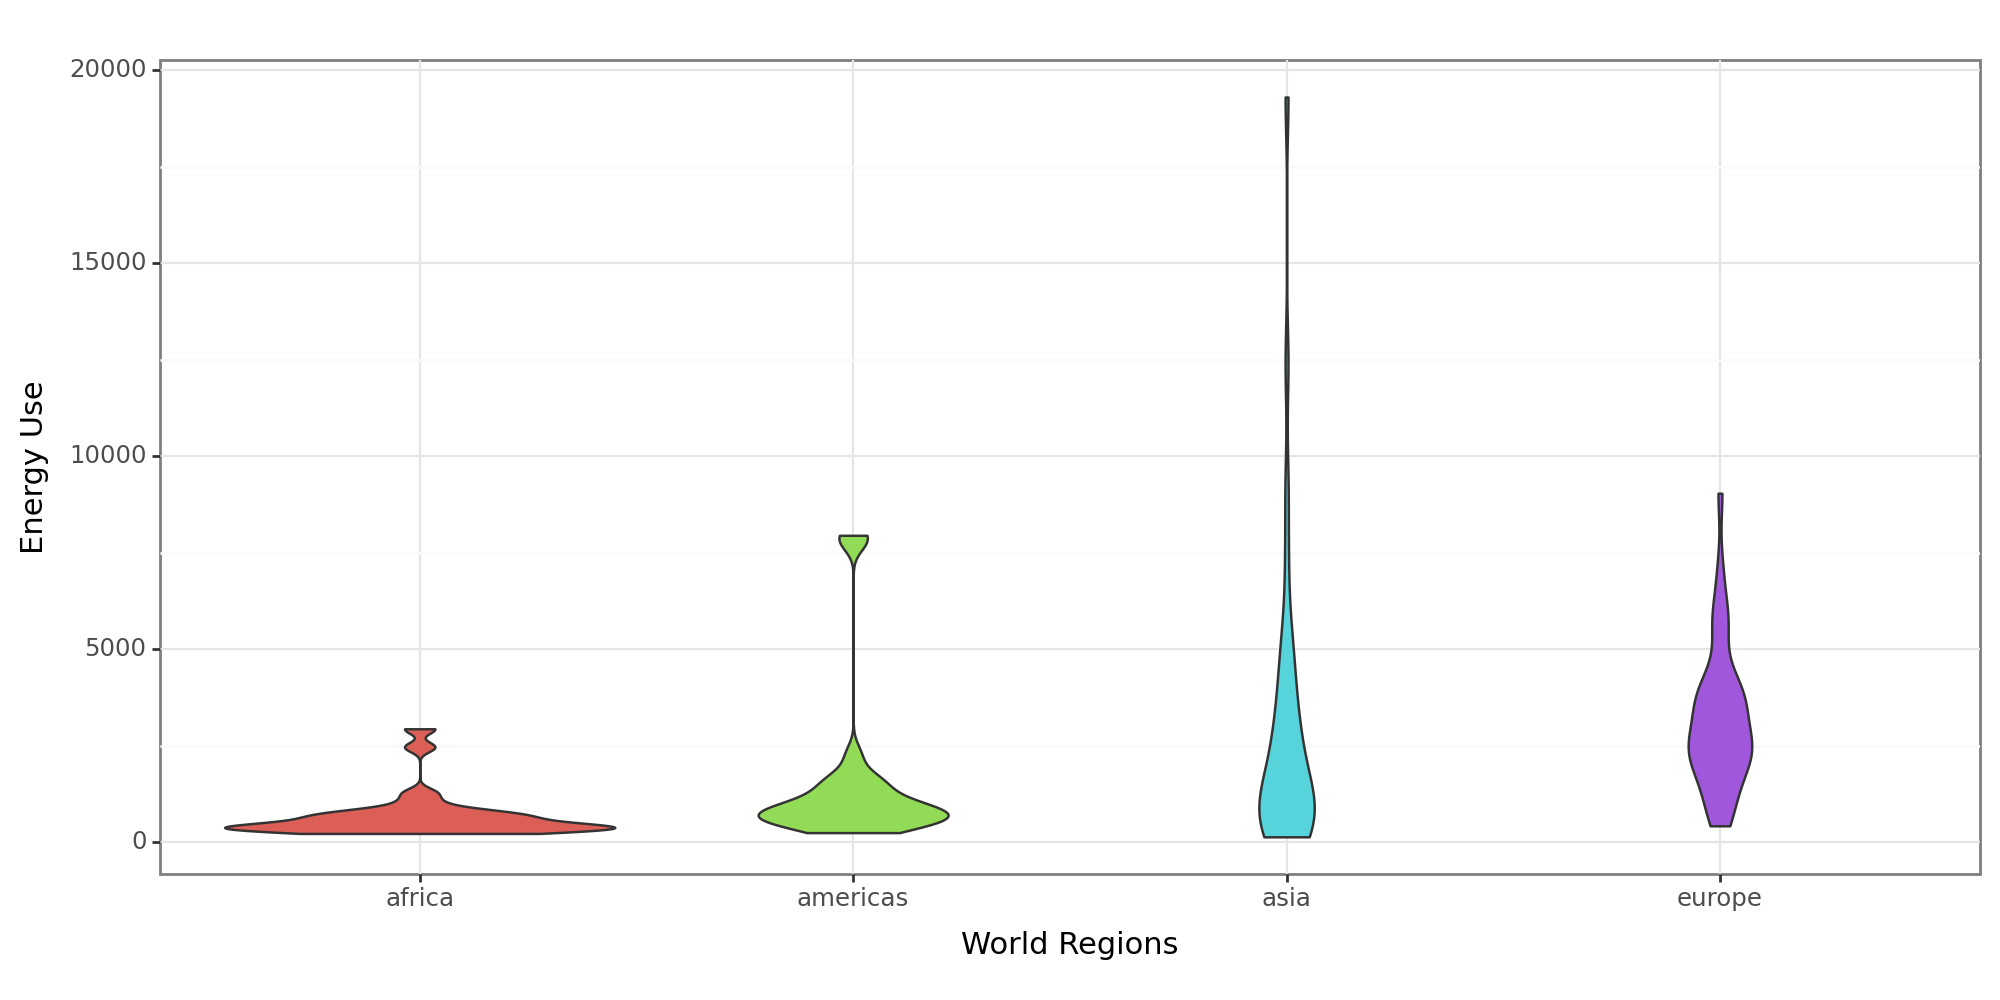

In [19]:
#creating a variable export to import ratio
df2.loc[:,'imports/exports'] = df2['imports']/df2['exports']

#Creating a plot of import/export ratio by country faceted by 4 regions
plot = (ggplot(df2, aes(x= 'country', y= 'imports/exports', fill = 'four_regions'))
        +geom_bar(stat='identity')
        +facet_wrap('~four_regions')
        + ylab ('Import to Export Ratio')
        + theme_bw()
        + theme(figure_size=(10, 5), legend_position = 'none')
        )

# creating plot of import to export ratio by country by world region
plot2 = (ggplot(df2, aes(x= 'four_regions', y= 'imports/exports', fill = 'four_regions'))
        +geom_violin()
        + ylab ('Import to Export Ratio')
        + xlab ('World Regions')
        + theme_bw()
        + theme(figure_size=(10, 5), legend_position = 'none')
        )

# plot with population by country by world region
plot3 = (ggplot(df2, aes(x= 'four_regions', y= 'energy', fill = 'four_regions'))
        +geom_violin()
        + ylab ('Energy Use')
        + xlab ('World Regions')
        + theme_bw()
        + theme(figure_size=(10, 5), legend_position = 'none')
        )

print(plot)
print(plot2)
print(plot3)

## **Task 3**
# 1- Identify, and list here, what aesthetics are being used and which variables are being mapped to each aesthetic.

Aestethics

*   X/Y Position -- GDP per capita y-axis, individuals using the internet on the x-axis
*   Color -- World Regions
*   Size -- Income
*   Texts (Annotations) -- year of which this data is from (2001 on the back)


# 2- Import the q3data.csv dataset.


In [20]:
df3 = pd.read_csv('C:/Users/Fernando Fonseca/Documents/Cal_Poly/Grad_school/Fall/GSB_544/Data/q3data.csv')
df3 = df3.dropna(subset=['internet_users', 'income','gdp','four_regions'])

# 3- Recreate the plot as best you can using plotnine.

C:\Anaconda\Lib\site-packages\plotnine\scales\scale.py:783: RuntimeWarning: divide by zero encountered in log10


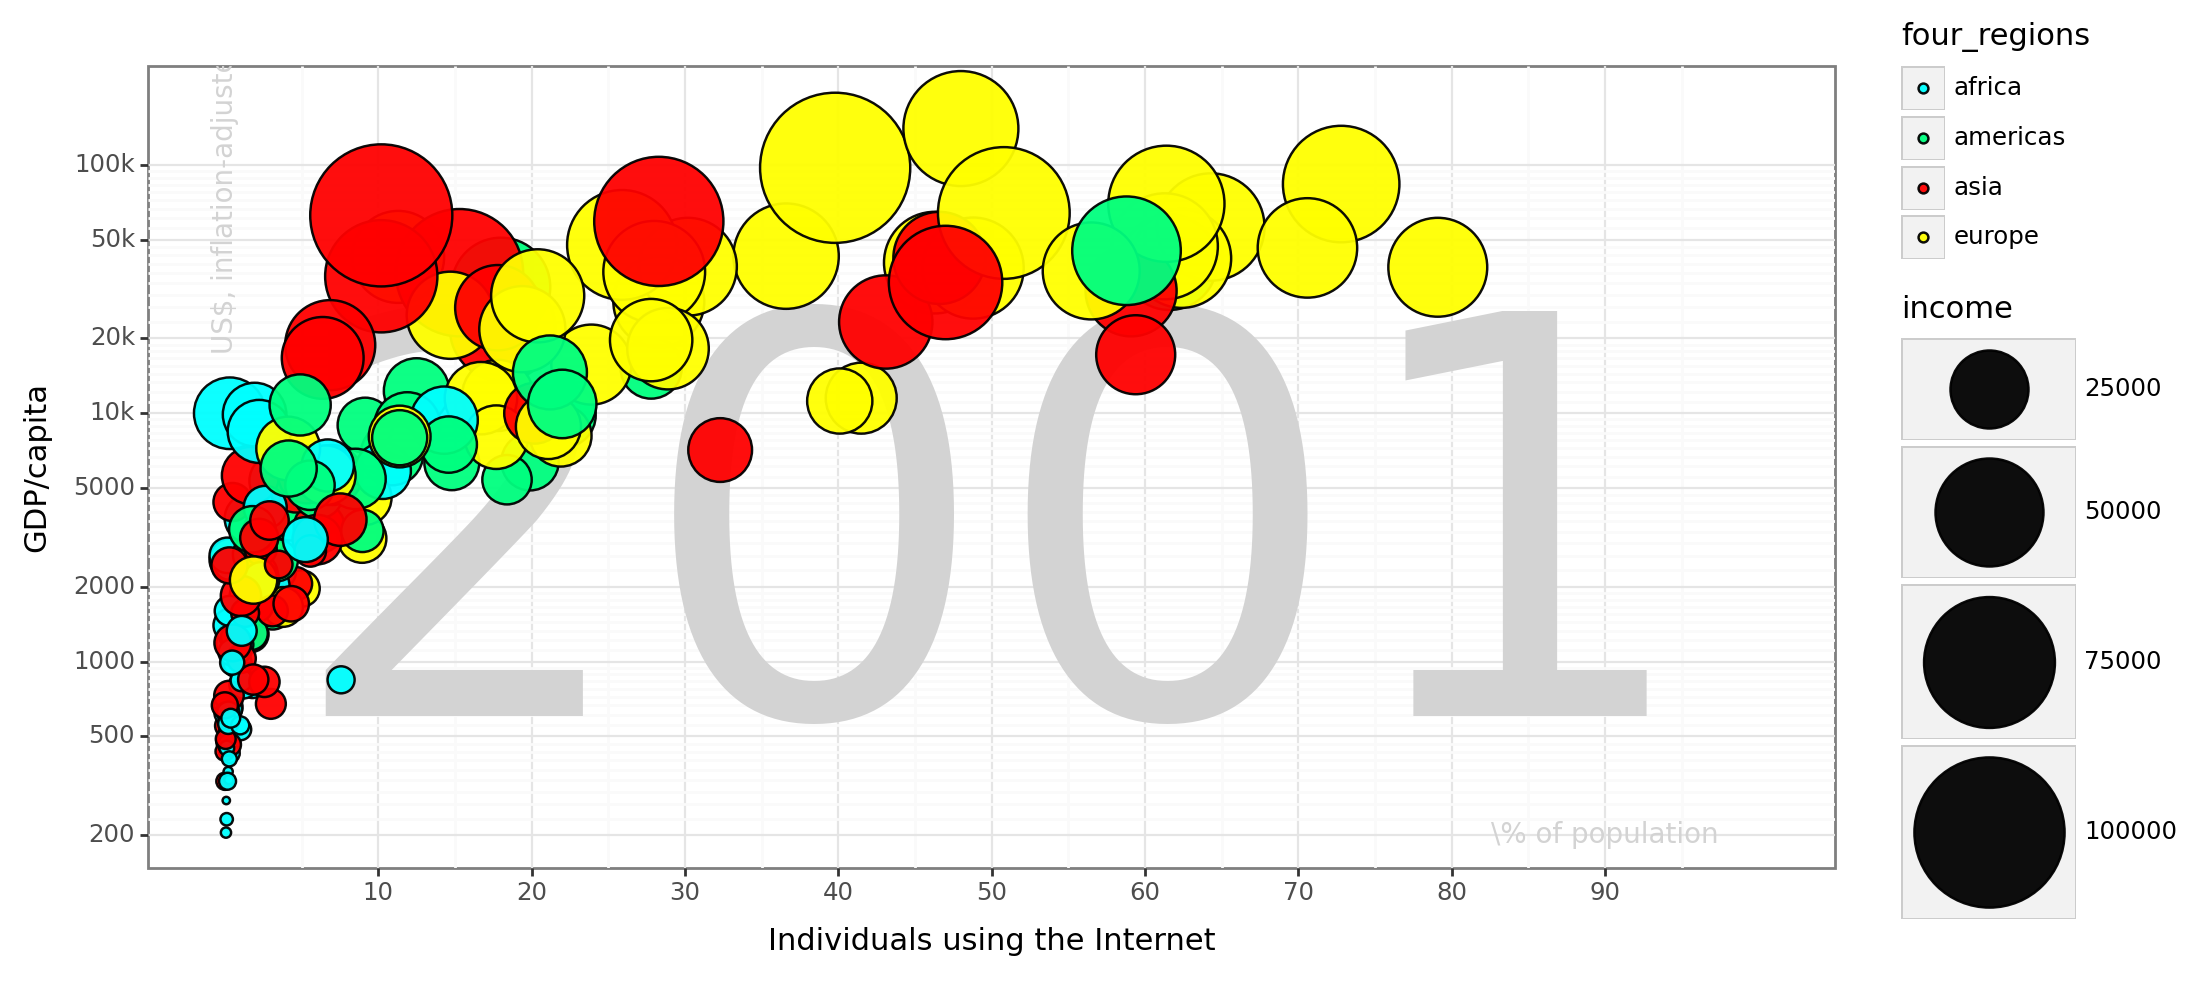

In [24]:
#Creating geom text data frame
dflabel3 = pd.DataFrame({
    'x': [50,0,90],
    'y': [2500,75000,200],
    'text': ['2001','US$, inflation-adjusted','\% of population'],

})

#creating custom colors for four regons
custom_colors = {
    'asia': 'red',
    'europe': 'yellow',
    'africa': 'cyan',
    'americas': 'springgreen',

}

#replicating plot
plot=(ggplot(df3,
             aes(x='internet_users', y='gdp')
             )
        + geom_text(data=dflabel3, mapping=aes(label = 'text', x='x', y='y'), color = 'lightgray', size = [200,10,10], angle = [0,90,0])
        + geom_point(aes(fill='four_regions', size='income'), na_rm=True, alpha=.95)
        + xlab ('Individuals using the Internet')
        + ylab ('GDP/capita')
        + scale_x_continuous(breaks =[10,20,30,40,50,60,70,80,90], limits = (0,100))
        + scale_y_continuous(trans= 'log10', breaks=(200,500,1000,2000,5000,10000,20000,50000,100000), labels= ('200','500','1000','2000','5000','10k','20k','50k','100k'), limits = (0,250000))
        + scale_fill_manual (values=custom_colors)
        + scale_size(range=(1,30))
        + theme_bw()
        + theme(figure_size=(11, 5))
)

print(plot)

# 4- What other geometries could you use here besides geom_point? Provide an actual plot of another geometry being used here and why it’s good or bad for visualizing these data.

You could again use the same ones I said above, suchas box plots, violin plot, bar charts, but again, they would have to be about one numeric variable at a time. You could also use a map as a plot with bubbles as well. This is what I did. The map looks great, but since i am trying to compare so many variables it might be hard to see them all. In europe too, since all the countries are too close together, it is hard to see what bubble belongs to what country. furthermore, GDP is expressed by the apha, or shade of the bubble, so it is really hard to compare them to each other, specially since the bubbles also have different colors based on the countries number of individuals using the internet.

In [28]:
!pip install geopandas

In [32]:

from pandas.io.parsers.readers import fill
import geopandas as gpd

# Load the world shapefile from geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the world shapefile with the data
df3_2 = world.set_index('name').join(df3.set_index('country'))

# Remove rows where geometry or income or gdp is NaN (these won't be plotted)
df3_2 = df3_2.dropna(subset=['geometry', 'income', 'gdp', 'internet_users'])


C:\Users\Fernando_Fonseca\Desktop\ipykernel_336\960022265.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.


<string>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

<string>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.



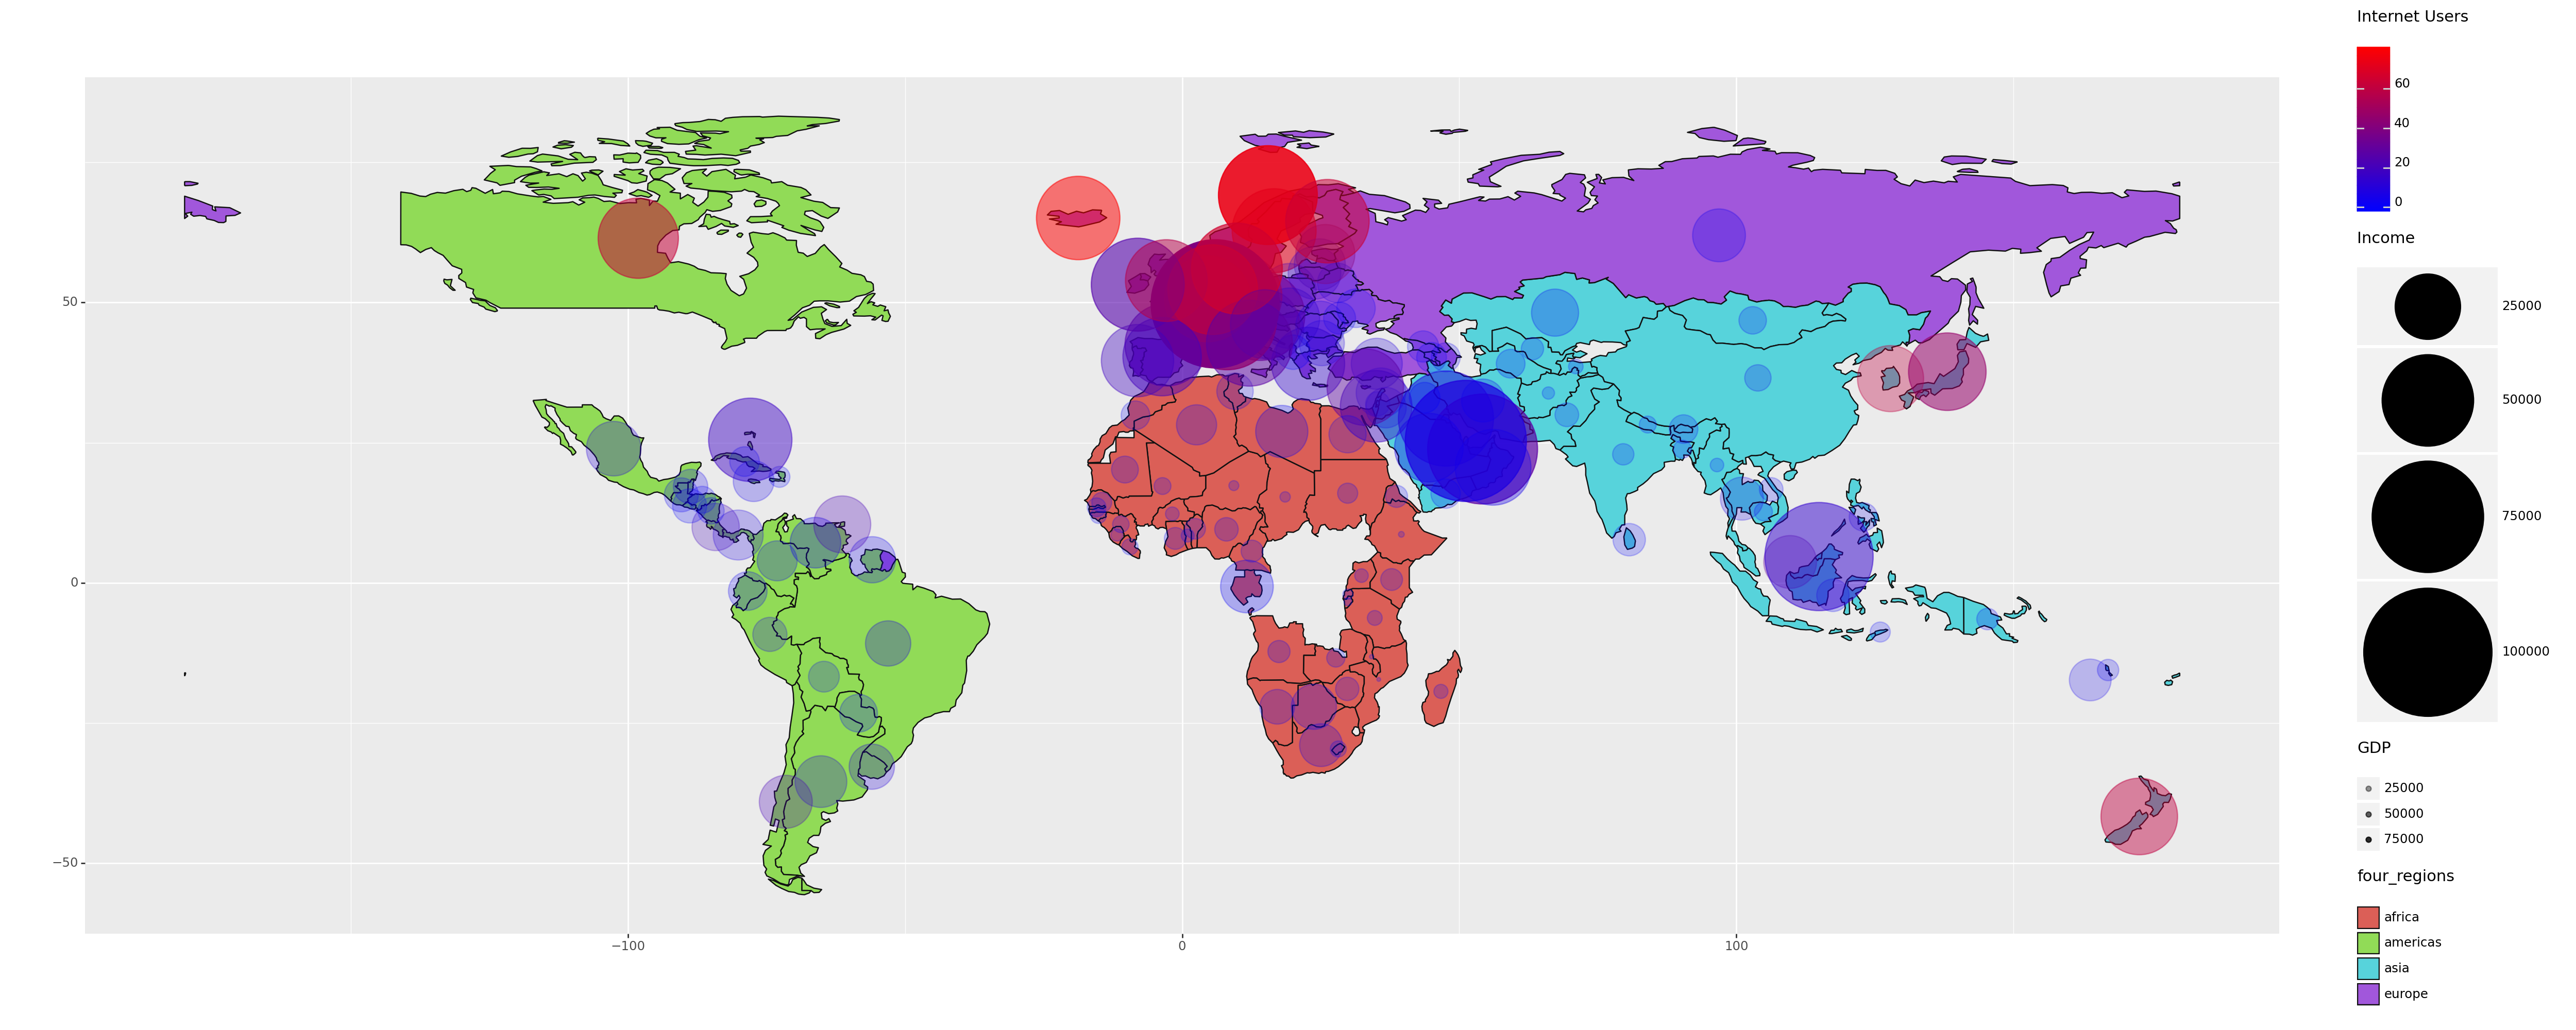

In [33]:
plot = (
    ggplot(df3_2)
    + geom_map(aes(fill='four_regions'))
    + geom_point(aes(x='geometry.centroid.x', y='geometry.centroid.y', size='income', color='internet_users', alpha='gdp'))
    + scale_color_gradient(name='Internet Users', low='blue', high='red')
    + scale_size_continuous(name = 'Income', range=[1, 50])
    + scale_alpha_continuous(name='GDP', range=[0.2, 1])
    + xlab('')
    + ylab('')
    + theme(figure_size=(25, 10))
)

print(plot)

## Resources Used
https://plotnine.readthedocs.io/en/stable/generated/plotnine.geoms.geom_point.html   
https://www.datanovia.com/en/blog/ggplot-theme-background-color-and-grids/#:~:text=You%20can%20easily%20and%20quickly,in%20the%20function%20theme()%20.  
https://ggplot2-book.org/annotations    
https://ggplot2.tidyverse.org/reference/geom_text.html
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html
https://github.com/has2k1/plotnine/issues/249

